<a href="https://colab.research.google.com/github/nicolasquant/Mercado_Financeiro/blob/main/Geometric_brownian_motion_implem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

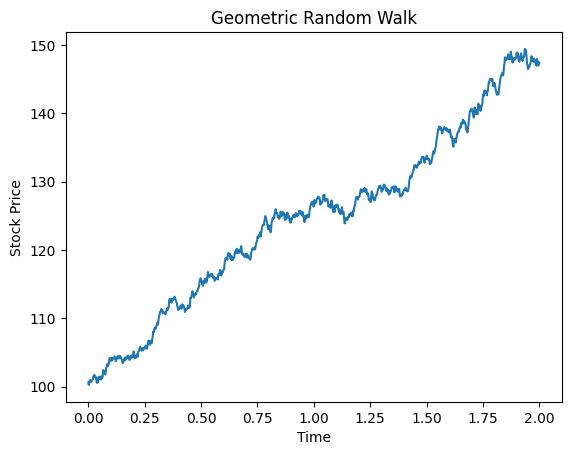

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

""" Note: esse é um ótimo modelo para stock prices pois diferentemete do wiener process, o geometric
brownian motion não admite valores negativos para as ações. """



def simulate_geometric_random_walk(S0, T=2, N=1000, mu=0.1, sigma=0.06):
    dt = T / N
    t = np.linspace(0, T, N)
    # standard normal distribution N(0,1)
    W = np.random.standard_normal(size=N)
    #N(0,dt) = sqrt(dt)*N(0,1)
    W = np.cumsum(W) * np.sqrt(dt)
    X = (mu - 0.5 * sigma ** 2) * t + sigma * W
    S = S0 * np.exp(X)

    return t, S

def plot_geometric_random_walk(t, S):
    plt.plot(t, S)
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.title("Geometric Random Walk")
    plt.show()


if __name__ == "__main__":
    time, data = simulate_geometric_random_walk(100) # 10 dollars é o valor inicial da ação - note que como nossa def retorna t, S; nós podemos simplesmente definir novas variáveis t e S novamente
    plot_geometric_random_walk(time, data) # note, se diminuirmos sigma, nosso gráfico terá flutuações menores (teste isso)

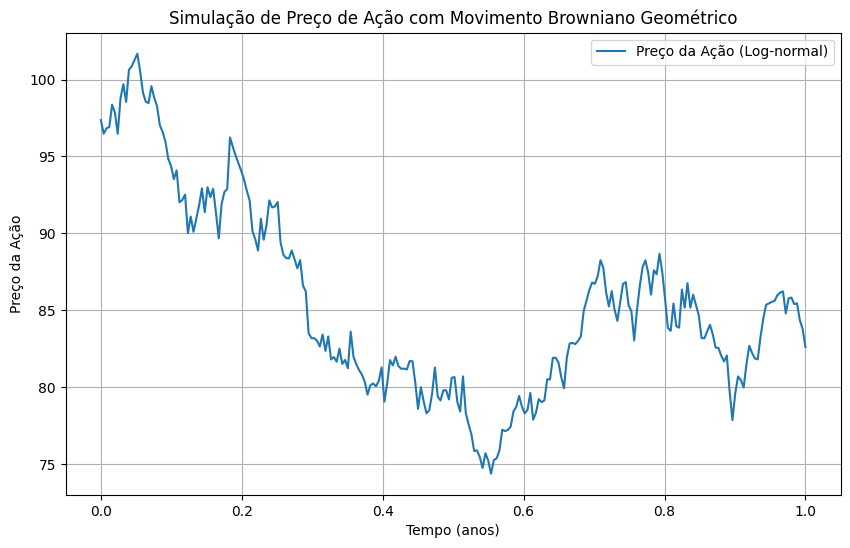

In [ ]:
''' o código abaixo foi feito pelo chat gpt'''
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
S0 = 100      # Preço inicial da ação
mu = 0.05     # Taxa média de retorno (em termos anuais)
sigma = 0.2   # Volatilidade do ativo
T = 1.0       # Período de tempo (em anos)
n_steps = 252 # Número de passos (número típico de dias úteis em um ano)

# Gerando o processo estocástico
dt = T / n_steps  # Intervalo de tempo entre os passos
t = np.linspace(0, T, n_steps)  # Vetor de tempo
W = np.random.standard_normal(size=n_steps)  # Movimento browniano
W = np.cumsum(W) * np.sqrt(dt)  # Integrando o movimento browniano
S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)  # Fórmula do GBM

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Preço da Ação (Log-normal)")
plt.title("Simulação de Preço de Ação com Movimento Browniano Geométrico")
plt.xlabel("Tempo (anos)")
plt.ylabel("Preço da Ação")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
<ipython-input-20-9e5b6a159f43>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Close'].fillna(method='ffill', inplace=True)
<ipython-input-20-9e5b6a159f43>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'].fillna(method='ffill', inplace=True)
<ipython-input-20-9e5b6a159f43>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
<ipy

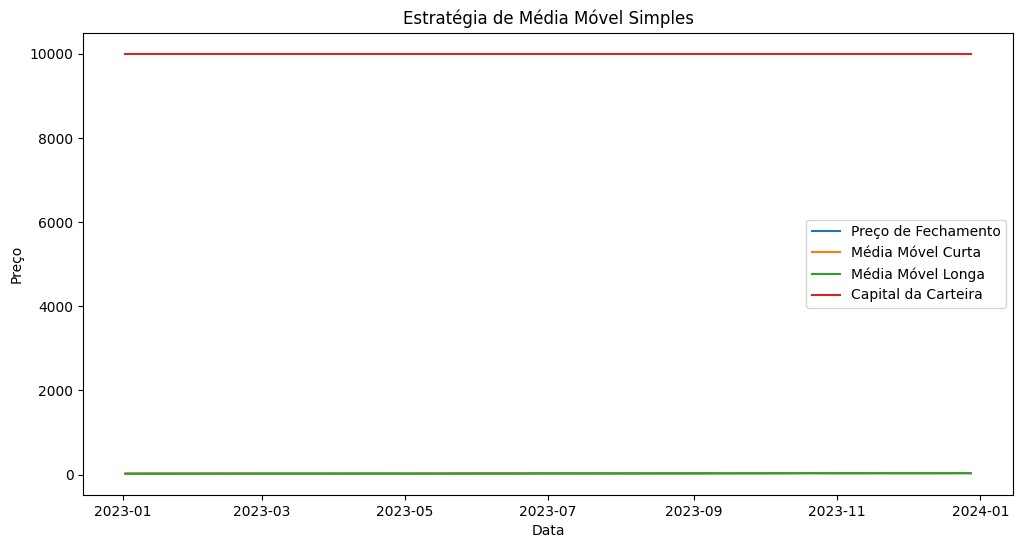

In [ ]:
'''além disso, o chat fez um código de como seria a operação em um mercado financeiro usando médias móveis'''

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da estratégia
ticker = 'PETR4.SA'  # Ação Petrobras
start_date = '2023-01-01'
end_date = '2023-12-31'
short_window = 5  # Média móvel curta
long_window = 20  # Média móvel longa

# Baixando os dados
data = yf.download(ticker, start=start_date, end=end_date)
data['Close'].fillna(method='ffill', inplace=True)

# Calculando médias móveis
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()

# Sinal de Compra/Venda
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] > data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()

# Backtesting simples da estratégia
initial_capital = 10000  # Capital inicial
data['Portfolio'] = initial_capital
position = 0

for i in range(1, len(data)):
    if data['Position'][i] == 1:  # Compra
        position = data['Close'][i]
    elif data['Position'][i] == -1 and position != 0:  # Venda
        profit = (data['Close'][i] - position) / position  # Retorno da operação
        data['Portfolio'][i:] += data['Portfolio'][i - 1] * profit
        position = 0
    else:
        data['Portfolio'][i] = data['Portfolio'][i - 1]  # Sem operação

# Plotando os resultados
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Preço de Fechamento')
plt.plot(data['Short_MA'], label='Média Móvel Curta')
plt.plot(data['Long_MA'], label='Média Móvel Longa')
plt.plot(data['Portfolio'], label='Capital da Carteira')
plt.title('Estratégia de Média Móvel Simples')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()
